In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_shape=(128, 128, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # Encoder: Contracting path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder: Expanding path
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

""" from tensorflow.keras.datasets import fashion_mnist

# Cargar el dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar las imágenes
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255 """

input_shape = (128, 128, 3)

# Crear el modelo U-Net
unet = unet_model(input_shape=input_shape, num_classes=1)
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
unet.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 512) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8,      │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 16, 16,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_transpose

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

Probamos codificar otra CNN manualmente siguiendo la misma estructura

(28, 64, 64, 1)
(60000,)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 64, 64,    │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 64, 64,    │      9,248 │ conv2d_19[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 32, 32,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 32, 32,    │     36,928 │ conv2d_21[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 16, 16,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 16, 16,    │    147,584 │ conv2d_23[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 8, 8, 128) │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 8, 8, 256) │    295,168 │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 8, 8, 256) │    590,080 │ conv2d_25[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 4, 4, 256) │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 4, 4, 512) │  1,180,160 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 4, 4, 512) │  2,359,808 │ conv2d_27[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 2, 2, 512) │          0 │ conv2d_28[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 2, 2,      │  4,719,616 │ max_pooling2d_8[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 2, 2,      │  9,438,208 │ conv2d_29[0][0]   │
│                     │ 1024)             │            │                 

 Total params: 31,093,921 (118.61 MB)

 Trainable params: 31,093,921 (118.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


c:\Python311\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 64, 64, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Python311\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 64, 64, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 9.9876e-05 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 7.8474e-05 - loss: 0.0000e+00
Precisión en el conjunto de prueba: 7.847377128200606e-05
Pérdida en el conjunto de prueba: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


c:\Python311\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (28, 64, 64, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


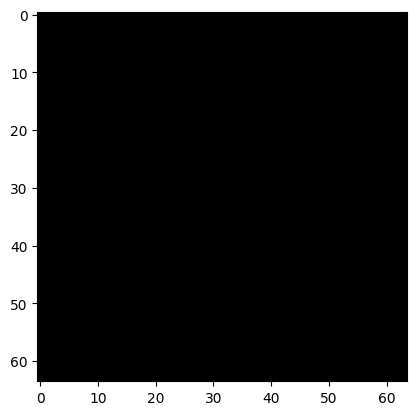

In [2]:
def unet_model_2(input_shape=(128, 128, 3), num_clases=10):
  inputs = layers.Input(shape=input_shape)

  # Encoder: Contracting path
  c1 = layers.Conv2D(32, (3 , 3), activation="relu", padding="same")(inputs)
  c1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(c1)
  p1 = layers.MaxPooling2D((2, 2))(c1)

  c2 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(p1)
  c2 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c2)
  p2 = layers.MaxPooling2D((2, 2))(c2)

  c3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(p2)
  c3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c3)
  p3 = layers.MaxPooling2D((2, 2))(c3)

  c4 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(p3)
  c4 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(c4)
  p4 = layers.MaxPooling2D((2, 2))(c4)

  c5 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(p4)
  c5 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(c5)
  p5 = layers.MaxPooling2D((2, 2))(c5)

  # Bottleneck
  c6 = layers.Conv2D(1024, (3, 3), activation="relu", padding="same")(p5)
  c6 = layers.Conv2D(1024, (3, 3), activation="relu", padding="same")(c6)

  # Decoder: Expanding path
  u7 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding="same")(c6)
  u7 = layers.concatenate([u7, c5])
  c7 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(u7)
  c7 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(c7)

  u8 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same")(c7)
  u8 = layers.concatenate([u8, c4])
  c8 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(u8)
  c8 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(c8)

  u9 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c8)
  u9 = layers.concatenate([u9, c3])
  c9 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(u9)
  c9 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c9)

  u10 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c9)
  u10 = layers.concatenate([u10, c2])
  c10 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(u10)
  c10 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c10)

  u11 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c10)
  u11 = layers.concatenate([u11, c1])
  c11 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(u11)
  c11 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(c11)

  outputs = layers.Conv2D(num_clases, (1, 1), activation="softmax")(c11)

  model = models.Model(inputs=[inputs], outputs=[outputs])
  return model

from tensorflow.keras.datasets import fashion_mnist

# Cargar el dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar las imágenes
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# cambiar el tamaño de las imágenes a 64x64
x_train = tf.image.resize(x_train, (64, 64)).numpy()
x_train = x_train.transpose((2, 0, 1))
x_train = tf.expand_dims(x_train, axis=-1)

x_test = tf.image.resize(x_test, (64, 64)).numpy()

# imprimimos las dimensiones de los datos
print(x_train.shape)
print(y_train.shape)

input_shape = (64, 64, 1)

# Crear el modelo U-Net
unet_2 = unet_model_2(input_shape=input_shape, num_clases=1)
unet_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Resumen del modelo
unet_2.summary()

# Entrear el modelo
unet_2.fit(x_train, x_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluar el modelo
test_loss, test_acc = unet_2.evaluate(x_train, x_train)
print("Precisión en el conjunto de prueba:", test_acc)
print("Pérdida en el conjunto de prueba:", test_loss)

# Predicción
predictions = unet_2.predict(x_train)
predictions.shape

# Mostramos el primer ejemplo
import matplotlib.pyplot as plt

plt.imshow(predictions[0], cmap="gray")
plt.show()

Probamos la codificación de CNN

C:\Users\Jafet\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


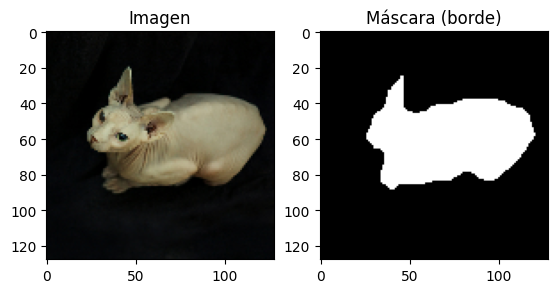

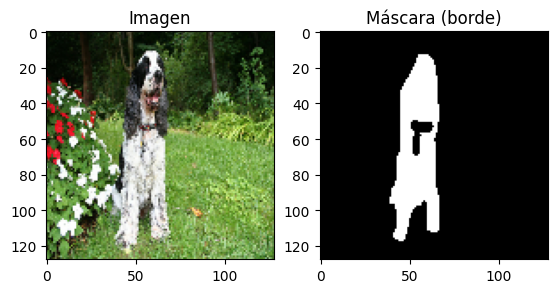

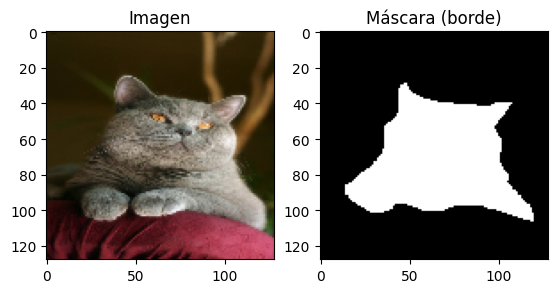

In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Oxford-IIIT Pet Dataset
dataset, info = tfds.load('oxford_iiit_pet', with_info=True)

# Dividir el conjunto de datos en entrenamiento y prueba
train_dataset = dataset['train']
test_dataset = dataset['test']

# Definir el tamaño de las imágenes
IMG_SIZE = 128  # Cambia este tamaño según tus necesidades

# Función para normalizar la imagen, redimensionar y convertir la máscara a one-hot encoding
def process_data(data):
    image = data['image']
    mask = data['segmentation_mask']

    # Redimensionar imagen y máscara
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    mask = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE))

    # Normalizar la imagen
    image = tf.cast(image, tf.float32) / 255.0

    # Convertir la máscara a un formato compatible con la red neuronal
    mask = tf.cast(mask, tf.int32)
    mask = tf.one_hot(mask, depth=3)

    # Usar solo la clase de objeto frente al fondo
    mask = mask[..., 1]  # Ignorar la clase de fondo en este caso

    return image, mask

# Aplicar el preprocesamiento a los conjuntos de datos
train_dataset = train_dataset.map(process_data)
test_dataset = test_dataset.map(process_data)

# Convertir a listas para uso posterior
X_train, y_train = [], []
X_test, y_test = [], []

for image, mask in train_dataset:
    X_train.append(image.numpy())
    y_train.append(mask.numpy())

for image, mask in test_dataset:
    X_test.append(image.numpy())
    y_test.append(mask.numpy())

# Convertir las listas a arrays numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Mostrar algunas imágenes y sus máscaras
for i in range(3):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(X_train[i])
    plt.title("Imagen")
    
    plt.subplot(1, 3, 2)
    plt.imshow(y_train[i], cmap='gray')  # Mostrar la clase de borde del objeto
    plt.title("Máscara (borde)")
    
    plt.show()

In [4]:
# Importamos la libreria que creamos de redes neuronales convolucionales
from CNN import ConvolutionalNeuralNetwork as CNN

# Creamos una instancia de la clase CNN
cnn = CNN(5, 64)

# Añadimos las capas
cnn.add_layer(64, (3, 3), "relu", "Conv2D", strides=(2, 2))
cnn.add_layer(64, (3, 3), "relu", "Conv2D")

cnn.add_layer(128, (3, 3), "relu", "Conv2D", strides=(2, 2))
cnn.add_layer(128, (3, 3), "relu", "Conv2D")

cnn.add_layer(256, (3, 3), "relu", "Conv2D", strides=(2, 2))
cnn.add_layer(256, (3, 3), "relu", "Conv2D")

cnn.add_layer(256, (3, 3), "relu", "Conv2DTranspose")
cnn.add_layer(256, (3, 3), "relu", "Conv2DTranspose", strides=(2, 2))

cnn.add_layer(128, (3, 3), "relu", "Conv2DTranspose")
cnn.add_layer(128, (3, 3), "relu", "Conv2DTranspose", strides=(2, 2))

cnn.add_layer(64, (3, 3), "relu", "Conv2DTranspose")
cnn.add_layer(64, (3, 3), "relu", "Conv2DTranspose", strides=(2, 2))

# Compialmos el modelo
cnn.compile(X_train, y_train, X_test, y_test, classes=2)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 16, 16, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 32, 32, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 32, 32, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 64, 64, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 64, 64, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 128, 128, 64)   │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 128, 128, 2)    │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,879,042 (10.98 MB)

 Trainable params: 2,879,042 (10.98 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 544ms/step - accuracy: 0.6837 - loss: 0.6406
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 552ms/step - accuracy: 0.7408 - loss: 0.4830
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 547ms/step - accuracy: 0.7953 - loss: 0.4354
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 549ms/step - accuracy: 0.8105 - loss: 0.4109
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 33s 562ms/step - accuracy: 0.8192 - loss: 0.3974
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8206 - loss: 0.3924
Accuracy: 0.8204966187477112
Loss: 0.3939875066280365


(0.3939875066280365, 0.8204966187477112)

In [5]:
# Probamos generar redes aleatorias
cnn2 = CNN(5, 64)

# Creamos una red aleatoria
cnn2.random_model(4, 256, 3)

# Compilamos el modelo
cnn2.compile(X_train, y_train, X_test, y_test, classes=2)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 64, 64, 154)    │         2,002 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 64, 64, 58)     │         8,990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 128, 128, 125)  │         7,375 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 128, 128, 153)  │        76,653 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 128, 128, 2)    │           308 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,328 (372.38 KB)

 Trainable params: 95,328 (372.38 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6992 - loss: 0.6187
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7006 - loss: 0.6105
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6977 - loss: 0.6027
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6921 - loss: 0.6001
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6867 - loss: 0.5930
115/115 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.6871 - loss: 0.5829
Accuracy: 0.6882563233375549
Loss: 0.581833004951477


(0.581833004951477, 0.6882563233375549)